#드라이브 바운드

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
#cd STAND1500
#cd TRAIN

#DATA 작 해주기 - train/test/validation


```
1. split folder ratio 사용
!pip install split-folders
import splitfolders

#splitfolders.ratio('인풋경로',output='output경로' ,seed=77, ratio= (0.8,0.1,0.1)) 
#처음폴더를 output foloder(없다면 생성해준후 실행)로 train-valid-test 데이터를 0.8,0.1,0.1의 비율로 나눠줘

# splitfolders.ratio('/content/drive/MyDrive/tmp/pose_estimiation/bad',)
```

#YOLO를 인식

In [ ]:
%cd /content

In [ ]:
!git clone https://github.com/dhrim/darkeras-yolov4

In [ ]:
%cd darkeras-yolov4

In [ ]:
!wget -O weights/yolov3.weights https://pjreddie.com/media/files/yolov3.weights

##모델 로딩

In [ ]:
import yolov3_wrapper
model = yolov3_wrapper.YoloV3Wrapper("weights/yolov3.weights")

In [ ]:
model.save("yolov3.h5")#

##이미지 로딩 
- 이는 sit, stand를 따로 진행한다.

In [ ]:
#폴더의 모든 사진을 불러옴 - 확인용 코드(안돌려도 됨)
import glob

for filename in glob.glob('/gdrive/MyDrive/PROJECT/DATA0829/SIT1500/*/*.jpg'):
  #print(filename)
  name_list = filename.split("/")
  #print(name_list)

#OpenPose

##프로젝트 다운로드

In [ ]:
%cd /content

In [ ]:
!git clone https://github.com/dhrim/Open-Pose-Keras

In [ ]:
%cd Open-Pose-Keras

##install library & 모델 로딩

In [ ]:
!pip install configobj

In [ ]:
from open_pose_wrapper import OpenPoseWrapper
model = OpenPoseWrapper()

##pose detect
- https://cmu-perceptual-computing-lab.github.io/openpose/web/html/doc/md_doc_03_python_api.html

In [ ]:
%cd /content/Open-Pose-Keras

In [ ]:
"""
#기존 예시 코드
file_name = "yuna.jpg"
all_peaks, subset, candidate = model.extract(file_name)
model.draw_result(file_name, all_peaks, subset, candidate, draw_dot=True, draw_line=True)
"""

from open_pose_wrapper import OpenPoseWrapper
이 부분을 시행 해주어야 error안난다.

#Get angle  vlaue_ori


In [ ]:
import glob
import config_reader
import math
from IPython.display import Image, display
from google.colab import output

#directory address
dad='/gdrive/MyDrive/PROJECT/DATA0829/SIT1500/TRAIN/*/*.jpg'

#for file_name in glob.glob('/gdrive/MyDrive/DATA0829/STAND1500/TRAIN/GOOD/IMG_0643.jpg'):
#for file_name in glob.glob('/gdrive/MyDrive/DATA0829/STAND1500/TRAIN/BAD4/IMG_9988.jpg'):
#for file_name in glob.glob('/gdrive/MyDrive/DATA0829/SIT1500/TEST/BAD1/20220817_190933_039.jpg'): #연습용 사진
for file_name in glob.glob('/gdrive/MyDrive/PROJECT/DATA0829/SIT1500/TRAIN/*/*.jpg'): #원하는 디렉토리 경로로 변경
  all_peaks,subset,candidate = model.extract(file_name)
  model.draw_result(file_name, all_peaks, subset, candidate, draw_dot=True, draw_line=True)

  #2
  model.extract_and_draw(file_name)

  #3
  #part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
  _, model_params = config_reader.config_reader()
  part_str = model_params['part_str']
  #print(len(all_peaks))

  #4
  #Relb가 없으면 왼쪽을 바라 본 사진임으로 Relb 유무로 사진의 좌우를 판별
  if not all_peaks[3]: #Relb가 없는 경우 - 왼쪽을 바라본 사진
    if not all_peaks[-2]:
      all_peaks[-2] = all_peaks[-1]

    neck_angle = math.degrees(math.atan2(all_peaks[5][0][1] - all_peaks[-2][0][1], all_peaks[5][0][0] - all_peaks[-2][0][0])) #어깨 - 귀
    spine_angle = math.degrees(math.atan2(all_peaks[12][0][1] - all_peaks[11][0][1], all_peaks[12][0][0] - all_peaks[11][0][0])) #무릎 - 엉덩이
  else: 
    if not all_peaks[-1]:
      all_peaks[-1] = all_peaks[-2]

    neck_angle = abs(math.degrees(math.atan2(all_peaks[-1][0][1] - all_peaks[2][0][1], all_peaks[-1][0][0] - all_peaks[2][0][0]))) #귀 - 어깨
    spine_angle = math.degrees(math.atan2(all_peaks[9][0][1] - all_peaks[8][0][1], all_peaks[9][0][0] - all_peaks[8][0][0]))

  print(f"angle: neck_angle = {neck_angle}, spine_angle = {spine_angle}")

  #5
  #10을 빼고 반올림
  neck_angle = round(neck_angle / 10)
  spine_angle = round(spine_angle / 10)

  print(f"label: neck_angle = {neck_angle}, spine_angle = {spine_angle}")

###Get angle  vlaue_데이터 저장 수행 함수 이용법


In [ ]:
# #확인용
# %%writefile /gdrive/MyDrive/PROJECT/OTHER/filen.csv
# num1"/"test, alpha, the_data

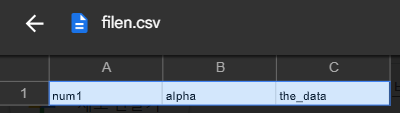

##Get angle  vlaue_save.csv (09/05)


In [ ]:
  #6_save   /  x, y, NA, SA, class1, class2 #file 초기화 작업도 가능
  %%writefile /gdrive/MyDrive/PROJECT/DATA0829/tmp_data/stand0906.csv
  XYsh,mXYear,XYkn,XYbt,NA,SA,clasf1,clasf2,clasf3

In [ ]:
import pandas as pd
import numpy as np
cv_ad='/gdrive/MyDrive/PROJECT/DATA0829/tmp_data/stand0906.csv'
tmp_dict=pd.read_csv (cv_ad)
tmp_dict

```
https://www.geeksforgeeks.org/how-to-append-pandas-dataframe-to-existing-csv-file/
``` --> we can write the dataframe to the CSV file in append mode by the parameter a using the pandas to_csv() function.
적용은 작업완료후 되는듯?

추출된 점이 담긴 all_peaks는 18개의 요소가 있는 리스트이다.
- part_str[#] :신체부위 text
- all_peaks[1#][2#][3#] :
    - [1#] : the people tuple data to list // 즉 한 신체부위의 값이다. 다수의 사람에 대해
```
(484, 130, 0.7376982569694519, 1)
  x    y   score               point_id
```
    - [2#] : one person data
    - [3#] : 한 사람의 데이터에서 특정 데이터 추출
- 18 parts
```
part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
```

##train sit에 대해서만(전반적으로 이용가능하게 수정 필요./반복을 가능한 줄이자)
- 저장하는 부분
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
-임의로 stand부분을 학습 시켰는데
```
FILE_NAME /gdrive/MyDrive/PROJECT/DATA0829/STAND1500/TRAIN/GOOD/20220819_153418_025_saved.jpg
['', 'gdrive', 'MyDrive', 'PROJECT', 'DATA0829', 'STAND1500', 'TRAIN', 'GOOD', '20220819_153418_025_saved.jpg']
pos: STAND state: GOOD name: 20220819_153418_025_saved.jpg
angle: neck_angle = 84.90788487550104, spine_angle = 88.5607103721176
tmp_dict:          XYsh     XYear       XYkn       XYbt    NA    SA clasf1 clasf2  \
0  (92, 175)  (83, 74)  (92, 599)  (87, 400)  80.0  90.0  STAND   GOOD   
```
식으로 특수처리 되어야 햐는 부분조차 나오고 있다. 저장할때도 이러는지는 확실치는 않다.

In [ ]:
import glob
import config_reader
import math
from IPython.display import Image, display
from google.colab import output

#directory address
dad='/gdrive/MyDrive/PROJECT/DATA0829/STAND1500/TRAIN/*/*.jpg'
#/gdrive/MyDrive/PROJECT/DATA0829/STAND1500/TRAIN/BAD1
for file_name in glob.glob(dad): #원하는 디렉토리 경로로 변경
  all_peaks,subset,candidate = model.extract(file_name)
  model.draw_result(file_name, all_peaks, subset, candidate, draw_dot=True, draw_line=True)#
  print("FILE_NAME",file_name)
  #get data feacture - split text -> pos,state,fname 
  d=file_name.split("/")#return list
  print(d)
  pos=d[d.index("DATA0829")+1].strip("1500")
  st=d[d.index("DATA0829")+3]
  fn=d[d.index("DATA0829")+4]
  print("pos:",pos,"state:",st,"name:",fn)
  #2
  #model.extract_and_draw(file_name)#

  #3
  #part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
  _, model_params = config_reader.config_reader()
  part_str = model_params['part_str']

  #4
  #Relb가 없으면 왼쪽을 바라 본 사진임으로 Relb 유무로 사진의 좌우를 판별
    #에러 처리
  try:
    if not all_peaks[3]: #Relb가 없는 경우 - 왼쪽을 바라본 사진
      if not all_peaks[-2]:
        all_peaks[-2] = all_peaks[-1]
    #atan2(y, x) 
      neck_angle = math.degrees(math.atan2(all_peaks[5][0][1] - all_peaks[-2][0][1], all_peaks[5][0][0] - all_peaks[-2][0][0])) #어깨 - 귀
      spine_angle = math.degrees(math.atan2(all_peaks[12][0][1] - all_peaks[11][0][1], all_peaks[12][0][0] - all_peaks[11][0][0])) #무릎 - 엉덩이
      
      sx,sy=all_peaks[5][0][0],all_peaks[5][0][1]
      ex,ey= all_peaks[-2][0][0], all_peaks[-2][0][1]
      kx,ky=all_peaks[12][0][0],all_peaks[12][0][1]
      bx,by= all_peaks[11][0][0], all_peaks[11][0][1]
    else: 
      if not all_peaks[-1]:
        all_peaks[-1] = all_peaks[-2]
      neck_angle = abs(math.degrees(math.atan2(all_peaks[-1][0][1] - all_peaks[2][0][1], all_peaks[-1][0][0] - all_peaks[2][0][0]))) #귀 - 어깨
      spine_angle = abs(math.degrees(math.atan2(all_peaks[9][0][1] - all_peaks[8][0][1], all_peaks[9][0][0] - all_peaks[8][0][0])))
      
      sx,sy= all_peaks[2][0][0], all_peaks[2][0][1]
      ex,ey=all_peaks[-1][0][0],all_peaks[-1][0][1]
      kx,ky= all_peaks[8][0][0], all_peaks[8][0][1]
      bx,by= all_peaks[9][0][0], all_peaks[9][0][1]
    print(f"angle: neck_angle = {neck_angle}, spine_angle = {spine_angle}")
  except IndexError:
    print("Indexerror file name is....",fn,"\n")#에러 분명히 날껀데 이 구문 출력이 왜 안뜨는지...
    continue
  sxy=(sx,sy)
  exy=(ex,ey)
  kxy=(kx,ky)
  bxy=(bx,by)

  #4-1 90degree over 예외처리?맞는지 확인 필요(09/05)
  if neck_angle>90:
    neck_angle=neck_angle-90
  elif spine_angle>180:
    spine_angle=spine_angle-180
  #5
    #10을 빼고 반올림
  #print('Before Round',f"angle: neck_angle = {neck_angle}, spine_angle = {spine_angle}")
  neck_angle = round(neck_angle ,- 1)
  spine_angle = round(spine_angle,- 1)
  #6-1/ not working
    #tmp_dict.loc[len(tmp_dict)]=[sxy,exy,kxy,bxy,neck_angle,spine_angle,None,None]
  #6-2
  dt={ "XYsh":[sxy],"XYear":[exy],"XYkn":[kxy],"XYbt":[bxy],"NA":[str(neck_angle)],"SA":[str(spine_angle)],
       "clasf1":[pos],"clasf2":[st],"clasf3":[fn] }
  tmp_dict=pd.DataFrame(dt)
  tmp_dict.to_csv(cv_ad,mode='a',index=False,header=False)
  print("tmp_dict: ",tmp_dict)
  #print("FINAL",f"label: neck_angle = {neck_angle}, spine_angle = {spine_angle}")


##파일 출력하는 기능[csv]
- tmp (9/6)

In [ ]:
import csv
#directory address
#dad='/gdrive/MyDrive/PROJECT/DATA0829/SIT1500/TRAIN/*/*.jpg'

for file_name in glob.glob(cv_ad):
  with open(file_name, newline='', encoding='utf-8') as f:
      reader = csv.reader(f)#to_csv로 바꾸기
      for row in reader:
          print(row)#저장을 해야할까 바로 불러서 쓰는 방식을 이용해야 하는지 고민해야 할것 같다.

##확인용?

In [ ]:
import config_reader

_, model_params = config_reader.config_reader()
part_str = model_params['part_str']
for i in range(18):
  print(part_str[i], ": ", all_peaks[i])

In [ ]:
#기존 예시 코드 - 실행 x
model.extract_and_draw(file_name)

###all peaks print

In [ ]:
print(len(all_peaks))

In [ ]:
import config_reader

_, model_params = config_reader.config_reader()
part_str = model_params['part_str']
for i in range(18):
  print(part_str[i], ": ", all_peaks[i])


- 1개의 point는 다음과 같이 구성된다.
```
(484, 130, 0.7376982569694519, 1)
  x    y   score               point_id
```
- point_id는 all_peaks에 명시되어 있다.

```
all_peaks의 내용

(177, 6, 0.11634597013471648, 0)
(484, 130, 0.7376982569694519, 1)
(287, 154, 0.9168482273817062, 2)
(410, 221, 0.9359188675880432, 3)

각 줄의 마지막 숫자가 point_id이다.
```

subset의 경우 이미지에서 한 사람의 값을 가진다.

각 포인트별 연결 가능 여부는 limSeq에 담겨 있다.



[2, 3] 은 neck과 Rsho(righst shoulder)가 연결되어 있음을 의미하고, 

[3,4]는 Rsho(righst shoulder)와 Relb(right elbow)가 이어져 있다는 것을 의미한다.

```
1: nose
2: neck
3: Rsho
4: Relb
5: Rwri
...
```


#Save&Load .csv file data


```
x, y, NA, SA, class1, class2

```
- if the vlaue not exist- > 0 or None
-  참고자료 
https://colab.research.google.com/github/datascienceschool/book/blob/master/ds/01%20python/04.02%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%9E%85%EC%B6%9C%EB%A0%A5.ipynb#scrollTo=ZQxwXT9GP-4A

`%%writefile` 매직(magic) 명령으로 만들어보자. 이 명령은 셀에 서술한 내용대로 텍스트 파일을 만드는 명령이다.
```
%%writefile STAND_TRAIN.csv
x, y, NA, SA, class1, class2
```

## CSV파일로부터 데이터를 읽어 데이터 프레임을 만들 때
- CSV 파일로부터 데이터를 읽어 데이터프레임을 만들 때는 `pandas.read_csv` 함수를 사용한다. 함수의 입력값으로 파일 이름을 넣는다.
- 확장자가 CSV가 아닌 파일 즉, 데이터를 구분하는 구분자(separator)가 쉼표(comma)가 아니면 `sep` 인수를 써서 구분자를 사용자가 지정해준다. 만약 길이가 정해지지 않은 공백이 구분자인 경우에는 `\s+` 정규식(regular expression) 문자열을 사용한다.
- 만약 자료 파일 중에 건너 뛰어야 할 행이 있으면 ```skiprows ```인수를 read_csv함수에 적용하여 이용
- 특정한 값을 NaN으로 취급하고 싶으면 `na_values` 인수에 NaN 값으로 취급할 값을 넣는다.

In [ ]:
pd.read_csv('STAND_TRAIN.csv')

In [ ]:
#pd.read_table('STAND_TRAIN.txt', sep='\s+')#pd.read_csv('sample4.txt', skiprows=[0, 1])
#df = pd.read_csv('sample5.csv', na_values=['누락'])

##CSV파일 출력
- `to_csv` 메서드를 사용한다.(cat과 비슷하게 인자를 추가해서 이용이 가능)

#Vanilla CNN Template


##모듈임포팅

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import Callback

import time

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2
import tensorflow as tf


In [ ]:
model = keras.Sequential()
model.add(Input((224,224,3)))
model.add(GaussianNoise(0.1))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [ ]:
#다중분류
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['acc'])
#good,bad만 분류하면되니까 2진분류
# model.compile(loss='binary_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

def normalize(image):
  return image/255.0

preprocessor = normalize
BATCH_SIZE = 64 # BATCH_SIZE = 128

train_data_generator = ImageDataGenerator(#이미지 augmentation(증가) / return v - 입력이 변형된 상태
      rotation_range=5, #bad1~4,good 5개
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(#이미지가 저장된 폴더를 기준으로 라벨 정보와 함께 이미지를 불러들임
      "/gdrive/MyDrive/PROJECT/DATA0829/STAND1500/TRAIN",#학습시킬 경로
      target_size=(224,224),#이미지 크기 fix - 넘어가게 되면 그래픽 에러 남
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor#이미지 처리전에 주어진 값을곱해 크기를 조정.    
).flow_from_directory(
      "/gdrive/MyDrive/PROJECT/DATA0829/STAND1500/TEST", #test경로
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'pose_best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
#모델체크포인트

In [ ]:
history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=100, callbacks=[model_check_point]
)

In [ ]:
from keras.models import load_model
model = load_model('pose_best_model.h5')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = next(iter(test_data_generator))
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/save_and_load.ipynb?hl=ko

참고 사이트